In [2]:
import os
import glob
from torch.utils.data import Dataset
import pickle
import os
import numpy as np

In [3]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os
from __future__ import print_function
import pathlib
import IPython.display as ipd  # To play sound in the notebook

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


from six.moves import xrange

import umap

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchsummary import summary
import random
from torchviz import make_dot, make_dot_from_trace

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [285]:
torch.cuda.current_device()

0

In [287]:
torch.cuda.is_available()

True

In [7]:
# PATHS 

raw_data = '/home/ubuntu/speech2speech/data/raw/VCTK-Corpus'
interim_data = os.path.join('/home/ubuntu/speech2speech/data', 'interim')
spectogram_array_path =  os.path.join(interim_data, 'spectogram_array')
spectogram_array_path_trim_30db =  os.path.join(interim_data, 'spectogram_array_trim_30db')
spectogram_array_path_trim_30db_ntft_512 = os.path.join(interim_data, 'spectogram_array_path_trim_30db_ntft_512')
spectrogram_path =os.path.join(interim_data, 'spectogram') 
audio_path = '/home/ubuntu/speech2speech/data/raw/VCTK-Corpus/wav48/'
trim_audio_path = '/home/ubuntu/speech2speech/data/trim_silence_30db'

In [235]:
# MKDIR
if not os.path.exists(interim_data):
    os.makedirs(interim_data)

if not os.path.exists(spectogram_array_path):
    os.mkdir(spectogram_array_path)

In [32]:
spectogram_array_path_trim_30db

'/home/ubuntu/speech2speech/data/interim/spectogram_array_trim_30db'

## Load Data 

In [33]:
import os
import glob

files_np = list(glob.glob(os.path.join(spectogram_array_path_trim_30db
,'*.*')))

In [9]:
len(files_np)

44242

In [34]:
files_np[0]

'/home/ubuntu/speech2speech/data/interim/spectogram_array_trim_30db/trim_spec_p237_165.npy'

In [10]:
col_shape = []
for file in files_np: 
    trial_x = np.load(file)
    _, cols = trial_x.shape
    col_shape.append(cols)

In [12]:
plt.hist?

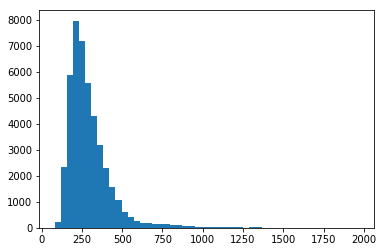

In [13]:
plt.hist(col_shape, bins = 50)

max_col = max(col_shape)

In [31]:
files_np[0].split('/')[-1][1:4]

'236'

In [41]:
max_col=100
X_list = []
Y_list = []
for file in files_np:     
    load_x = np.load(file)
    x = np.zeros((load_x.shape[0], max_col), dtype = np.float32)
    c = min(max_col, load_x.shape[1])
    x[:load_x.shape[0], :c] = load_x[:, :c]
    
    x =torch.tensor(x, device='cpu').float()
    trial_y = file.split('trim_spec_p')[1][:3]
    trial_y =torch.tensor(int(trial_y), device='cpu').float()
    X_list.append(x)
    Y_list.append(trial_y)

In [42]:
Y_np_list = []
for file in files_np: 
    trial_y = file.split('trim_spec_p')[1][:3]
    Y_np_list.append(trial_y)


In [43]:
Y_np_list= list(set(Y_np_list))

In [44]:
speaker_dic = { Y_np_list[i]: i for i in range(0, len(Y_np_list) ) }

In [46]:
x_Tensor= torch.stack(X_list)

In [47]:
y_Tensor= torch.stack(Y_list)

In [48]:
full_tensordataset = torch.utils.data.TensorDataset(x_Tensor, y_Tensor)

In [51]:
full_loader = torch.utils.data.DataLoader(full_tensordataset, batch_size= 10 ,pin_memory= True, shuffle= True  )

In [58]:
train_val_size = int(0.9 * len(full_tensordataset))
test_size = len(full_tensordataset)- train_val_size
train__val_dataset, test_dataset = torch.utils.data.random_split(full_tensordataset, [train_val_size, test_size])
train_size = int(0.9 * len(train__val_dataset))
val_size = len(train__val_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train__val_dataset, [train_size, val_size])

In [259]:
len(train__val_dataset)

39817

In [63]:
len(test_dataset)+len(train_dataset)+len(val_dataset)

44242